# Cipher Challenge
From [Simon Singh's The Code Book](https://simonsingh.net/cryptography/cipher-challenge/the-ciphertexts/)
## Stage 4
Vigenere Cipher

In [1]:
cipher_text = """    K Q O W E F V J P U J U U N U K G L M E K J I

    N M W U X F Q M K J B G W R L F N F G H U D W

    U U M B S V L P S N C M U E K Q C T E S W R E

    E K O Y S S I W C T U A X Y O T A P X P L W P

    N T C G O J B G F Q H T D W X I Z A Y G F F N

    S X C S E Y N C T S S P N T U J N Y T G G W Z

    G R W U U N E J U U Q E A P Y M E K Q H U I D

    U X F P G U Y T S M T F F S H N U O C Z G M R

    U W E Y T R G K M E E D C T V R E C F B D J Q

    C U S W V B P N L G O Y L S K M T E F V J J T

    W W M F M W P N M E M T M H R S P X F S S K F

    F S T N U O C Z G M D O E O Y E E K C P J R G

    P M U R S K H F R S E I U E V G O Y C W X I Z

    A Y G O S A A N Y D O E O Y J L W U N H A M E

    B F E L X Y V L W N O J N S I O F R W U C C E

    S W K V I D G M U C G O C R U W G N M A A F F

    V N S I U D E K Q H C E U C P F C M P V S U D

    G A V E M N Y M A M V L F M A O Y F N T Q C U

    A F V F J N X K L N E I W C W O D C C U L W R

    I F T W G M U S W O V M A T N Y B U H T C O C

    W F Y T N M G Y T Q M K B B N L G F B T W O J

    F T W G N T E J K N E E D C L D H W T V B U V

    G F B I J G Y Y I D G M V R D G M P L S W G J

    L A G O E E K J O F E K N Y N O L R I V R W V

    U H E I W U U R W G M U T J C D B N K G M B I

    D G M E E Y G U O T D G G Q E U J Y O T V G G

    B R U J Y S"""

Let's remove all the spaces and line breaks that appeared when copying and pasting from the web page.

In [2]:
cipher_text = "".join(cipher_text.split())

In [3]:
cipher_text

'KQOWEFVJPUJUUNUKGLMEKJINMWUXFQMKJBGWRLFNFGHUDWUUMBSVLPSNCMUEKQCTESWREEKOYSSIWCTUAXYOTAPXPLWPNTCGOJBGFQHTDWXIZAYGFFNSXCSEYNCTSSPNTUJNYTGGWZGRWUUNEJUUQEAPYMEKQHUIDUXFPGUYTSMTFFSHNUOCZGMRUWEYTRGKMEEDCTVRECFBDJQCUSWVBPNLGOYLSKMTEFVJJTWWMFMWPNMEMTMHRSPXFSSKFFSTNUOCZGMDOEOYEEKCPJRGPMURSKHFRSEIUEVGOYCWXIZAYGOSAANYDOEOYJLWUNHAMEBFELXYVLWNOJNSIOFRWUCCESWKVIDGMUCGOCRUWGNMAAFFVNSIUDEKQHCEUCPFCMPVSUDGAVEMNYMAMVLFMAOYFNTQCUAFVFJNXKLNEIWCWODCCULWRIFTWGMUSWOVMATNYBUHTCOCWFYTNMGYTQMKBBNLGFBTWOJFTWGNTEJKNEEDCLDHWTVBUVGFBIJGYYIDGMVRDGMPLSWGJLAGOEEKJOFEKNYNOLRIVRWVUHEIWUURWGMUTJCDBNKGMBIDGMEEYGUOTDGGQEUJYOTVGGBRUJYS'

## Strategy
To break the Vignere cipher, we need to find sequences of more than 4 letters that are repeated. Then we measure how many characters there are between the repetitions, so we can compute the length of the key. Then we can extract all the monoalphabetic ciphers, and work on each one.

## Finding the length of the key
### Figuring out repeated sequences



In [4]:
sequence_length = 10
total_length = len(cipher_text)
print(total_length)

604


In [5]:
word1 = cipher_text[:sequence_length]
print(word1)

KQOWEFVJPU


In [6]:
def check_length(sequence_length, cipher_text=cipher_text):
    """Check repetition of sequences of a given length in the cipher text"""
    repeated = []
    for i in range(1, total_length - 2 * sequence_length):
        seq_to_test = cipher_text[i:i+sequence_length]
        if (cipher_text.count(seq_to_test) > 1) & (seq_to_test not in repeated):
            repeated.append(seq_to_test)
    return repeated

In [7]:
repetition = {}
for seq_len in range(10, 3, -1):
    repetition[seq_len] = check_length(seq_len)

In [8]:
repetition

{10: [],
 9: [],
 8: [],
 7: ['WXIZAYG', 'NUOCZGM'],
 6: ['WXIZAY', 'XIZAYG', 'NUOCZG', 'UOCZGM'],
 5: ['WXIZA', 'XIZAY', 'IZAYG', 'NUOCZ', 'UOCZG', 'OCZGM', 'DOEOY'],
 4: ['EFVJ',
  'WXIZ',
  'XIZA',
  'IZAY',
  'ZAYG',
  'EKQH',
  'NUOC',
  'UOCZ',
  'OCZG',
  'CZGM',
  'EEDC',
  'DOEO',
  'OEOY',
  'IDGM',
  'FTWG',
  'WGMU']}

We notice that some shorter words are subparts of longer words, we should remove them.

In [9]:
all_words = [word for list_of_words in repetition.values() for word in list_of_words]

In [10]:
sub_words = [word for word1 in all_words for word in all_words if word in word1 and word != word1]

In [11]:
unique_words = set(all_words) - set(sub_words)

In [12]:
print(unique_words)

{'EEDC', 'EFVJ', 'WXIZAYG', 'FTWG', 'IDGM', 'DOEOY', 'WGMU', 'NUOCZGM', 'EKQH'}


Now we have the minimal list of repeated words, we have to find the distance between the repetition.

In [13]:
import re

In [14]:
indices = [[m.start() for m in re.finditer(word, cipher_text)]for word in unique_words]

In [15]:
indices

[[193, 493],
 [4, 224],
 [105, 295],
 [438, 483],
 [349, 514, 574],
 [263, 308],
 [440, 560],
 [176, 256],
 [154, 374]]

In [16]:
differences = []
for line in indices:
    iter_line = iter(line)
    start = next(iter_line)
    for i in iter_line:
        differences.append(i - start)
        start = i

In [17]:
differences

[300, 220, 190, 45, 165, 60, 45, 120, 80, 220]

In [18]:
from math import gcd
from functools import reduce

In [19]:
reduce(gcd, differences)

5

So there we have it, the length of the Vignere key is 5.

## 5 monoaplhabetic ciphers
We the have 5 monoalphabetic encrypted texts that we need to decipher. The ciphers are caesar shift ciphers, so we can reuse the code from the stage 2.

In [20]:
ciphers = [cipher_text[i::5] for i in range(5)]

In [21]:
ciphers

['KFJKKWMWFWSNKSKIAAWGFWYSYSJGWJAKDGMHZWGDEJWLSFWWMSSTZEKGSSVWYAEWMLWSWSDGWASKUMDMMATFXIDWWWTHWMMLWWJDWVJDDSAKKLWIWJKDYDUVU',
 'QVUGJUKRGUVCQWOWXPPOQXGXNPNWUUPQUUTNGEKCCQVGKVWPTPKNGOCPKEGXGNOUEXNIUWGOGFIQCPGNVOQVKWCRGONTFGKGOGKCTGGGGWGJNRVWGCGGGGJGJ',
 'OJULIXJLHULMCRYCYXNJHIFCCNYZUUYHXYFUMYMTFCBOMJMNMXFUMYPMHIOIOYYNBYOOCKMCNFUHPVAYLYCFLCCIMVYCYYBFJNNLVFYMMGOOYIUUMDMMUGYGY',
 'WPNMNFBFUMPUTESTOPTBTZFSTTTGNQMUFTFORTEVBUPYTJFMHFFODEJUFUYZSDJHFVJFCVURMVDCFSVMFFUJNWUFUMBOTTBBFTEDBBYVPJEFNVHUUBBEOQOBS',
 'EUUEMQGNDBSEEESUTLCGDANESUGREEEIPSSCURERDSNLETMERSSCOERRRECAAOLAELNREICUANEECUEAMNANEOLTSAUCNQNTTEEHUIIRLLEEORERTNIETETR']

In [22]:
def shift_text(text, n):
    """Shift the text by n letters"""
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    deciphered_text = ""
    for letter in text:
        if letter not in letters:
            # spaces, punctuation
            new_letter = letter
        else:
            indice = letters.index(letter)
            new_ind = (indice + n) % 26
            new_letter = letters[new_ind]
        deciphered_text += new_letter
    return deciphered_text

Let also reuse the frequency analysis from stage 1, that did not work well, but could prove more useful here.

In [23]:
import altair as alt
import pandas as pd
from collections import Counter
from io import StringIO

In [24]:
def create_freq_df(text, name="freq"):
    """Returns a dataframe with relative frequency of letters in the text"""
    # Compute freqs from text
    cipher_freq = sorted(Counter(text).items())
    
    # Get a dataframe with the whole alphabet
    all_letters = pd.DataFrame({'letter': list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")})
    freqs = pd.DataFrame.from_records(cipher_freq, columns=["letter", name])
    complete_freqs = all_letters.merge(freqs, how='left').fillna(0)
    
    # Normalize the frequencies
    complete_freqs[name] = complete_freqs[name] / complete_freqs[name].sum()
    return complete_freqs.set_index("letter")

In [25]:
create_freq_df(ciphers[0], "freq_0").head()

,freq_0
letter,
A,0.057851
B,0.000000
C,0.000000
D,0.082645
E,0.024793


In [26]:
english_freq = pd.read_fwf(StringIO("""LET COUNT
E   445.2
T   330.5
A   286.5
O   272.3
I   269.7
N   257.8
S   232.1
R   223.8
H   180.1
L   145.0
D   136.0
C   119.2
U   97.3
M   89.5
F   85.6
P   76.1
G   66.6
W   59.7
Y   59.3
B   52.9
V   37.5
K   19.3
X   8.4
J   5.7
Q   4.3
Z   3.2"""), names=["letter", "eng_freq"], header=0)

In [27]:
english_freq = english_freq.sort_values("letter").set_index("letter")
english_freq["eng_freq"] = english_freq.eng_freq / english_freq.eng_freq.sum()

In [28]:
english_freq.head()

,eng_freq
letter,
A,0.080396
B,0.014845
C,0.033449
D,0.038164
E,0.124930


In [29]:
all_freqs = pd.concat((*map(create_freq_df, 
                            ciphers, 
                            ["freq_0", "freq_1", "freq_2", "freq_3", "freq_4"]), 
                       english_freq), 
                      axis=1)

In [30]:
all_freqs = all_freqs.stack().reset_index().rename(columns={"level_1":"text", 0:"freq"})

In [31]:
all_freqs.head()

,letter,text,freq
0,A,freq_0,0.057851
1,A,freq_1,0.000000
2,A,freq_2,0.008264
3,A,freq_3,0.000000
4,A,freq_4,0.066667


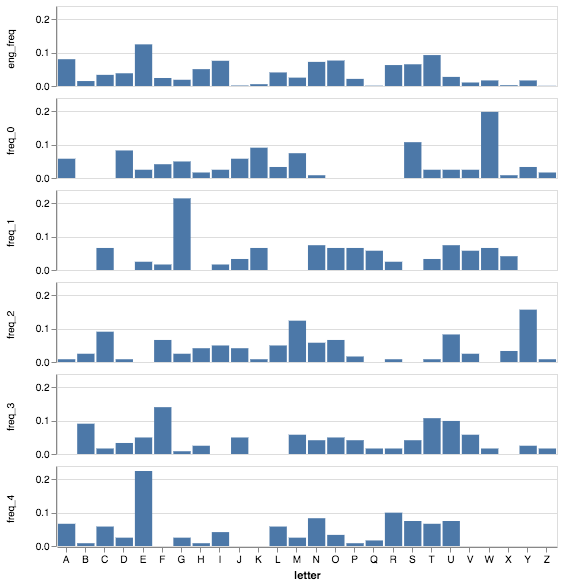

In [32]:
alt.Chart(all_freqs).mark_bar().encode(
    x=alt.X("letter:O", axis=alt.Axis(labelAngle=0)),
    y=alt.Y("freq:Q", axis=alt.Axis(title=None)),
    row=alt.Row("text:N", header=alt.Header(title=None)),
    tooltip="letter:O"
).properties(
    height=80,
    width=500
)

Looking at the patterns, it seems like the first text is shifted with the letter **"S"** corresponding to **"A"**. We can see that by the 2 spikes separated by 3 lower values, and some other moderately high values a bit later.
Following the same approach, I find the letters __C, U, B and A__ , which gives **SCUBA** for the key.

## Deciphering the whole text

Now, we can decipher the message given the key.

In [33]:
from itertools import zip_longest, chain

In [34]:
def vignere(text, key):
    key_length = len(key)
    # Split the text
    ciphers = [text[i::key_length] for i in range(key_length)]

    # Get the numerical values of the keys
    # The -1 is because we want to go back to the english letter from the key
    key_values = ["ABCDEFGHIJKLMNOPQRSTUVWXYZ".index(letter)*(-1) for letter in key]
    
    # Apply the shift for each text
    deciphered = map(shift_text, ciphers, key_values)

    # Zip to reconstruct the text in the correct order
    deciphered = zip_longest(*deciphered, fillvalue="")

    # Flatten the iterable and return a string
    return "".join(chain.from_iterable(deciphered))

In [35]:
vignere(cipher_text, "SCUBA")

'SOUVENTPOURSAMUSERLESHOMMESDEQUIPAGEPRENNENTDESALBATROSVASTESOISEAUXDESMERSQUISUIVENTINDOLENTSCOMPAGNONSDEVOYAGELENAVIREGLISSANTSURLESGOUFFRESAMERSAPEINELESONTILSDEPOSESSURLESPLANCHESQUECESROISDELAZURMALADROITSETHONTEUXLAISSENTPITEUSEMENTLEURSGRANDESAILESBLANCHESCOMMEDESAVIRONSTRAINERACOTEDEUXCEVOYAGEURAILECOMMEILESTGAUCHEETVEULELUINAGUERESIBEAUQUILESTCOMIQUEETLAIDLUNAGACESONBECAVECUNBRULEGUEULELAUTREMIMEENBOITANTLINFIRMEQUIVOLAITLEPOETEESTSEMBLABLEAUPRINCEDESNUEESQUIHANTELATEMPETEETSERITDELARCHERBAUDELAIREEXILESURLESOLAUMILIEUDESHUEESLEMOTPOURETAGEQUATREESTTRAJANSESAILESDEGEANTLEMPECHENTDEMARCHER'

Victory! The text is in french, we were lucky that the letter distribution is roughly the same as english.

The text is [L'Albatros](https://fr.wikipedia.org/wiki/L%27Albatros_(po%C3%A8me)) a poem by Charles Baudelaire.